In [33]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


In [62]:
x = np.load('/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Npy/Balanced/V1/Dataset120x360GreysNewCategories.npy')
print(x.shape)
print("x min: ", x.min())
print("x max: ", x.max())
print("x dtype: ", x.dtype)
data = np.load('Resultados/ResultadoCompleto/V6W10/ResultadosEstimacionDecodificacionSinCategorico.npy')
print(data.shape)

window = 10
rows = 120
cols = 360
channels = 1

(1254, 120, 360)
x min:  18.0
x max:  234.0
x dtype:  float32
(374, 4, 120, 360, 1)


<Figure size 2000x2000 with 0 Axes>

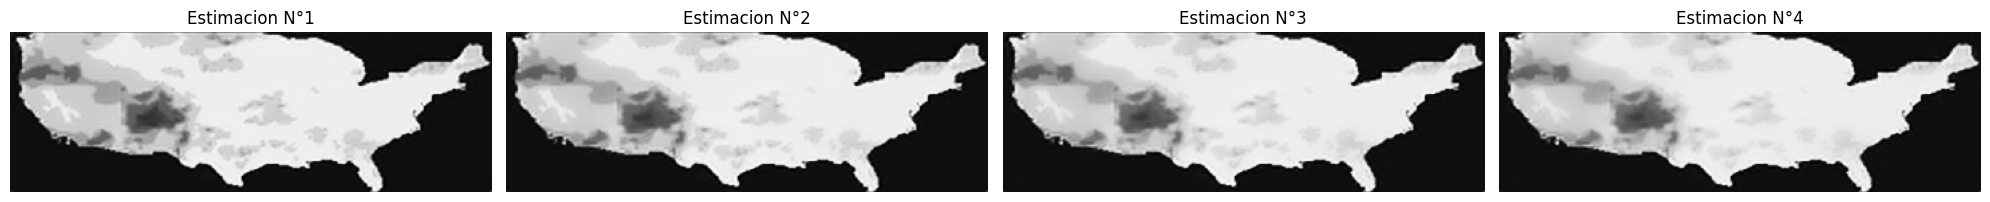

In [63]:

fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 100
horizon = 4

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(data[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Estimacion N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()

In [64]:
def create_shifted_frames_2(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, data.shape[1]-1, :, :]
    return x, y

def agroup_window(data, window):
    new_data = [data[i:window+i] for i in range(len(data)-window+1)]
    return np.array(new_data)



def reduce_data(data, window):
    # Calcula la cantidad deseada de elementos en el resultado final, igual al número de ventanas
    desired_length = len(data) - window + 1
    
    # Calcula el intervalo de selección para mantener el mismo número de elementos que el resultado de la agrupación en ventanas
    if desired_length > 1:
        step = len(data) // desired_length
    else:
        step = 1  # Evita la división por cero si desired_length es 1
    
    # Selecciona elementos de data a intervalos regulares
    reduced_data = data[::step]
    
    # Asegúrate de que el resultado final tenga la misma cantidad de elementos que el resultado de la agrupación en ventanas
    if len(reduced_data) > desired_length:
        reduced_data = reduced_data[:desired_length]
    
    return reduced_data

    #Crea cubos con su propia información de tamaño h
def get_cubes(data, h):
    new_data = []
    for i in range(0, len(data)-h):
        new_data.append(data[i:i+h])
    new_data = np.array(new_data)
    print(new_data.shape)
    return new_data

#Toma todos los colores existentes en la imagen
def get_colors(image):
  aux = []
  band = True
  for i in image:
    for j in i:

      for k in aux:
        if j.tolist() == k:
          band = False
          break
      if band:
        aux.append(j.tolist())
      band = True
  return np.array(aux)

def recolor_greys_image(data, palette):
    rows, cols = len(data), len(data[0])
    aux = np.zeros((rows, cols), dtype=np.uint64)
    for i in range(rows):
        for j in range(cols):
            aux[i,j] = min(palette, key= lambda x:abs(x-data[i,j]))
    return aux

def get_colors_optimized(image):
    # Aplanar la imagen a una lista de píxeles (forma: número de píxeles, canales)
    pixels = image.reshape(-1, image.shape[-1])
    
    # Utilizar np.unique para encontrar filas únicas (colores únicos) en los píxeles aplanados
    # axis=0 opera a lo largo del eje de las filas para encontrar filas únicas
    # return_counts=False para no retornar los conteos de cada color único
    unique_colors = np.unique(pixels, axis=0, return_counts=False)
    
    return unique_colors

def gray_quantized_optimized(img, palette):
    # Asegurar que img es un array de NumPy
    img = np.array(img, dtype=np.uint8)
    
    # Crear una imagen PIL directamente desde el array de NumPy
    oldImage = Image.fromarray(img, 'L')
    
    # Convertir la imagen a modo 'P' utilizando la paleta proporcionada
    # Nota: La paleta debe ser ajustada al formato esperado por PIL si es necesario.
    newImage = oldImage.quantize(palette=Image.fromarray(palette, 'P'))
    
    # Convertir la imagen cuantizada de vuelta a un array de NumPy
    res_image = np.asarray(newImage)
    
    return res_image

In [65]:
x_3 = reduce_data(x, window)
print(x_3.shape)

(1245, 120, 360)


In [66]:
x_2 = agroup_window(x, window)
print(x_2.shape)
x_train = x_2[:int(len(x_2)*.7)]
x_test = x_2[int(len(x_2)*.7):]
x_validation = x_train[int(len(x_train)*.8):]
x_train = x_train[:int(len(x_train)*.8)]
x_train = x_train.reshape(len(x_train), window, rows, cols, channels)
x_validation = x_validation.reshape(len(x_validation), window, rows, cols, channels)
x_test = x_test.reshape(len(x_test), window, rows, cols, channels)

print("Forma de datos de entrenamiento: {}".format(x_train.shape))
print("Forma de datos de validación: {}".format(x_validation.shape))
print("Forma de datos de pruebas: {}".format(x_test.shape))

x_train, y_train = create_shifted_frames_2(x_train)
x_validation, y_validation = create_shifted_frames_2(x_validation)
x_test, y_test = create_shifted_frames_2(x_test)

print("Training dataset shapes: {}, {}".format(x_train.shape, y_train.shape))
print("Validation dataset shapes: {}, {}".format(x_validation.shape, y_validation.shape))
print("Test dataset shapes: {}, {}".format(x_test.shape, y_test.shape))

#x_test, y_test = create_shifted_frames_2(x_test)

(1245, 10, 120, 360)
Forma de datos de entrenamiento: (696, 10, 120, 360, 1)
Forma de datos de validación: (175, 10, 120, 360, 1)
Forma de datos de pruebas: (374, 10, 120, 360, 1)
Training dataset shapes: (696, 9, 120, 360, 1), (696, 120, 360, 1)
Validation dataset shapes: (175, 9, 120, 360, 1), (175, 120, 360, 1)
Test dataset shapes: (374, 9, 120, 360, 1), (374, 120, 360, 1)


In [67]:
classes = np.array([0, 255, 220, 177, 119, 70, 35]) # 255, 220, 177, 119, 70, 35  0
classesBalanced = np.array([18, 54, 90, 126, 162, 198, 234])
rows = 120
cols= 360
print(rows)
print(cols)
h = 4

120
360


In [68]:
print("merged_data" ,data.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)
 
y_test = get_cubes(y_test, h)

merged_data (374, 4, 120, 360, 1)
x_test (374, 9, 120, 360, 1)
y_test (374, 120, 360, 1)
(370, 4, 120, 360, 1)


In [69]:
colors = get_colors_optimized(x_test[-10,0])
print("COLORSS", colors)
print("COLORS", colors.shape)

colorss = get_colors_optimized(data[-10,0])
print("COLORSS", colorss)
print("COLORS", colorss.shape)

COLORSS [[ 18.]
 [ 54.]
 [ 90.]
 [126.]
 [162.]
 [198.]
 [234.]]
COLORS (7, 1)
COLORSS [[0.00978628]
 [0.01257597]
 [0.01392461]
 ...
 [0.9774729 ]
 [0.97775501]
 [0.98507166]]
COLORS (41618, 1)


In [70]:
naive = x_test[:-4]
data = data[1:-3]

In [71]:
        
new_data = data[:, -h:]
n_real = naive[:, -h:]*255

        
naive = naive[:, -h:]

In [72]:
print("XX")
print(y_test.shape)
print(new_data.shape)
print(n_real.shape)

print(min(new_data[0,0,60]))
print(max(new_data[0,0,60]))

XX
(370, 4, 120, 360, 1)
(370, 4, 120, 360, 1)
(370, 4, 120, 360, 1)
[0.04958664]
[0.9608705]


In [73]:
new_data = new_data * 255
new_data = new_data.astype(np.uint8)

In [74]:
print("new_data", new_data.shape)
print(colorss.shape)
print(min(new_data[0,0,60]))
print(max(new_data[0,0,60]))

new_data (370, 4, 120, 360, 1)
(41618, 1)
[12]
[245]


In [75]:
new_data = new_data.reshape(new_data.shape[:-1])
print("HoY", new_data.shape)

HoY (370, 4, 120, 360)


In [76]:
aux = []
for i in new_data:
    aux2 = []
    for j in i:
        #res = cv2.cvtColor(j, cv2.COLOR_GRAY2RGB)
        #res = recolor_greys_image(j, classes)
        #rgb_quantized(res, classes_rgb)
        #res = cv2.cvtColor(res, cv2.COLOR_RGB2GRAY)
        res = gray_quantized_optimized(j, classesBalanced)
        res = recolor_greys_image(res, classesBalanced)
        aux2.append(res)
    aux.append(np.array(aux2))

In [77]:

new_data = np.array(aux)
print("SHAPEE", new_data.shape)
color_data = get_colors(new_data[-10,0])
print("DCOLORS", color_data)
new_data = new_data.reshape(new_data.shape[0],new_data.shape[1],new_data.shape[2],new_data.shape[3],1)

SHAPEE (370, 4, 120, 360)
DCOLORS [ 18  54  90 126 162 198 234]


In [78]:
#y_test = y_test * 255
#naive = naive * 255

print("YCOLORS", get_colors(y_test[-10,0]))
print("NCOLORS", get_colors(naive[-10,0]))
print("DCOLORS", get_colors(new_data[-10,0]))

print("XS")
print(f"new data shape {new_data.shape}")
print(f"y_test.shape {y_test.shape}")
print(f"new data shape {naive.shape}")

l_clas = len(classes)

YCOLORS [[ 18.]
 [234.]
 [162.]
 [126.]
 [ 90.]
 [198.]
 [ 54.]]
NCOLORS [[ 18.]
 [234.]
 [162.]
 [ 90.]
 [198.]
 [126.]
 [ 54.]]
DCOLORS [[ 18]
 [ 54]
 [ 90]
 [126]
 [162]
 [198]
 [234]]
XS
new data shape (370, 4, 120, 360, 1)
y_test.shape (370, 4, 120, 360, 1)
new data shape (370, 4, 120, 360, 1)


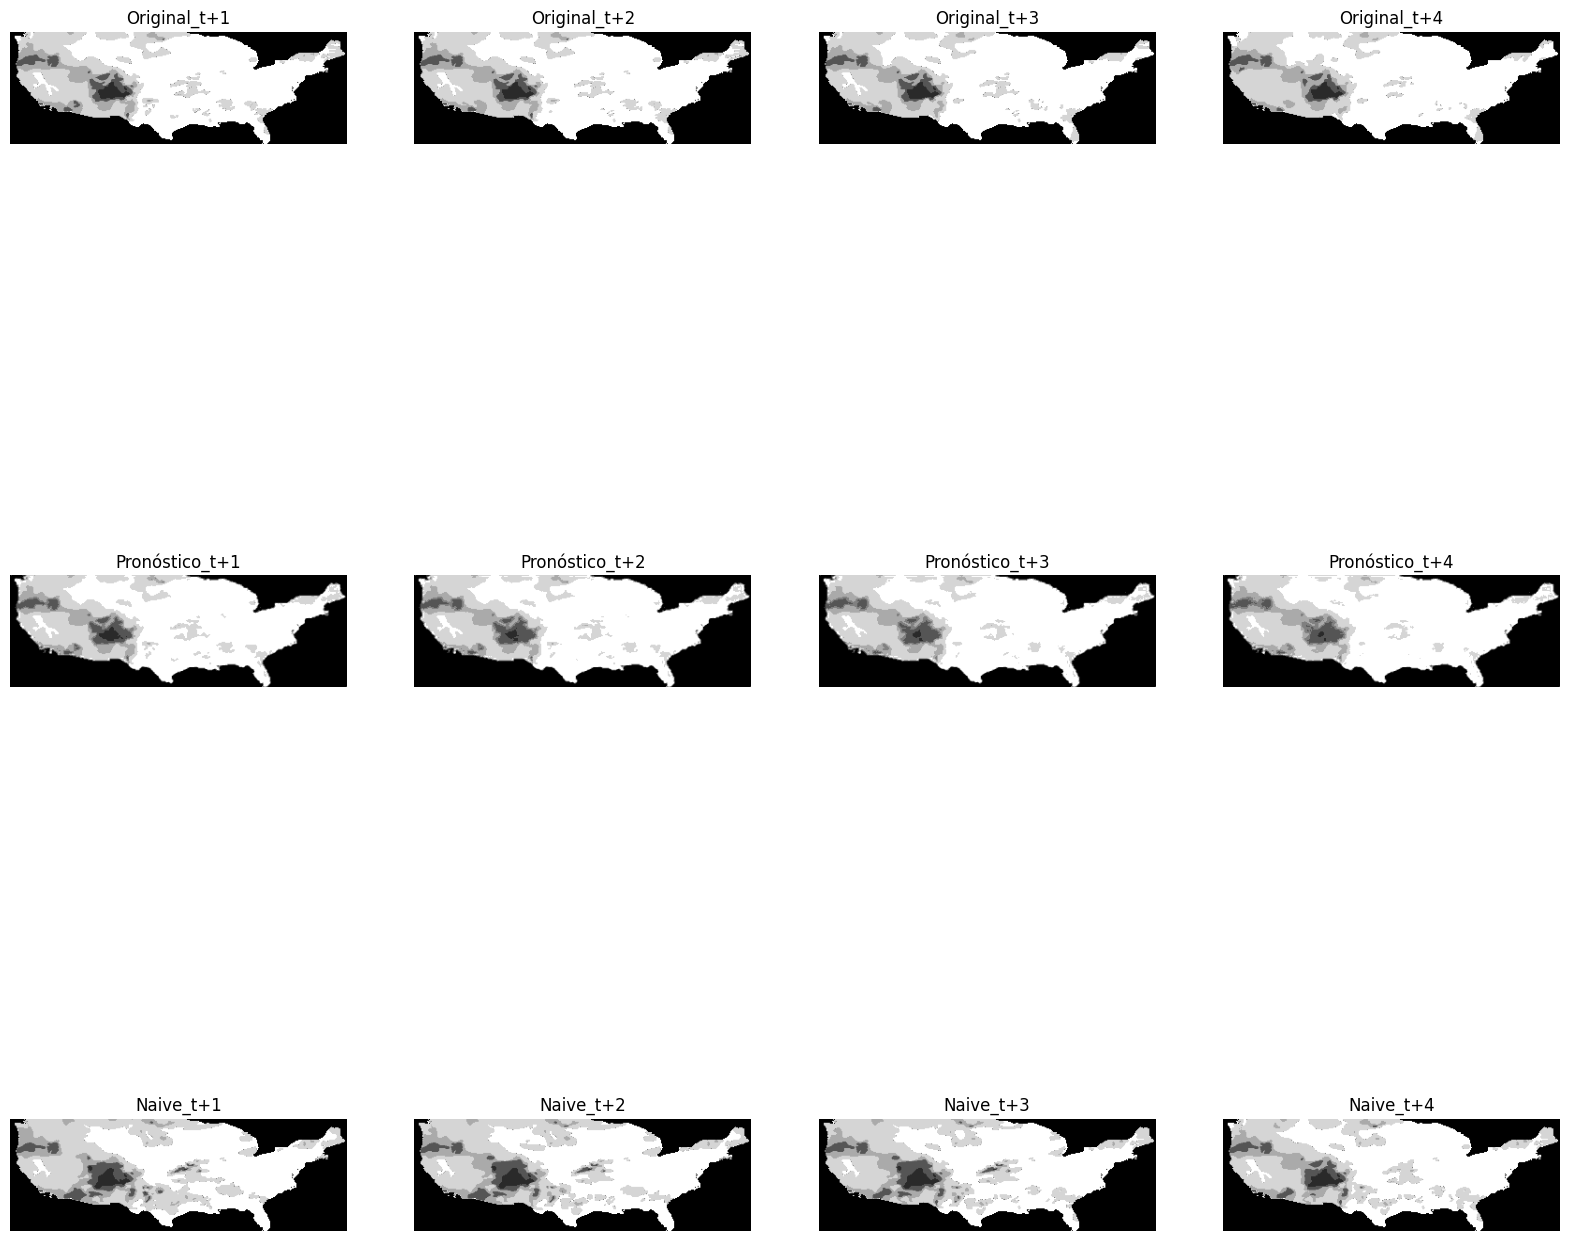

In [79]:

fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 100
for i in range(h):
    fig.add_subplot(r, c, ac)
    ac += 1
    plt.imshow(y_test[pos,i], cmap='gray')
    plt.axis('off')
    plt.title('Original_t+{}'.format(i+1))
for i in range(h):
    fig.add_subplot(r, c, ac)
    ac += 1
    plt.imshow(new_data[pos,i], cmap='gray')
    plt.axis('off')
    plt.title('Pronóstico_t+{}'.format(i+1))
for i in range(h):
    fig.add_subplot(r, c, ac)
    ac += 1
    plt.imshow(naive[pos,i], cmap='gray')
    plt.axis('off')
    plt.title('Naive_t+{}'.format(i+1))

plt.show()

In [80]:
#print 
print (f"lengeth x_test: {y_test.shape[0]}")
print (f"h: {h}")
print (f"rows: {rows}")
print (f"cols: {cols}")
#rows = 120
#cols = 360
print (f"rows: {rows}")
print (f"cols: {cols}")

lengeth x_test: 370
h: 4
rows: 120
cols: 360
rows: 120
cols: 360


In [81]:
cm_f = np.zeros((l_clas, l_clas), dtype=np.uint64)
cm_n = np.zeros((l_clas, l_clas), dtype=np.uint64)
print(cm_f)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [82]:
print("range rows" , range(rows))
print("range cols" , range(cols))

range rows range(0, 120)
range cols range(0, 360)


In [83]:
for e in range(y_test.shape[0]):
    for k in range(h):
        for i in range(rows):
            
            for j in range(cols):
                #print(f"e: {e}, k: {k}, i: {i}, j: {j}")
                
                pos1 = np.where(classesBalanced == y_test[e, k, i, j])[0][0]
                pos2 = np.where(classesBalanced == new_data[e, k, i, j])[0][0]
                pos3 = np.where(classesBalanced == naive[e, k, i, j])[0][0]
                cm_f[pos1, pos2] += 1
                cm_n[pos1, pos3] += 1

print("Matriz de confusión de pronóstico")
print(cm_f)
print("Matriz de confusión de naive")
print(cm_n)

Matriz de confusión de pronóstico
[[23837872   617012   189215    48856    12540     5940      153]
 [    1875   369121   453726    11350     2521      493       37]
 [     443    20171  1510475   470618   108513    17395      312]
 [     186     5006    29493   177344    46292    68518    29811]
 [     385     4274   103885   512317  2439048   601658    60249]
 [    2465      793    18061    80419   524179 10260039  1685922]
 [    3147     4125    18262    65790   186569  1286336 18042789]]
Matriz de confusión de naive
[[24711560       24        4        0        0        0        0]
 [       0   659231   157591     4278    15119     2688      216]
 [       0   134909  1491452    49896   368238    82362     1070]
 [       8     6516    46190   125204    73353    56809    48570]
 [      20    33606   335547    66085  2292237   907679    86642]
 [       0     7212    85998    54297   838343  9038390  2547638]
 [       0      391     3970    55290   114668  2472388 16960311]]


In [86]:
import pandas as pd
# Convert cm_f numpy array to pandas DataFrame
df_cm_f = pd.DataFrame(cm_f)

print(df_cm_f)

df_cm_n = pd.DataFrame(cm_n)

print(df_cm_n)

# Crear el DataFrame de la primera matriz de confusión como antes
df_cm_f = pd.DataFrame(cm_f, index=[f'True_{i}' for i in range(len(cm_f))],
                       columns=[f'Pred_{i}' for i in range(len(cm_f[0]))])

# Crear el DataFrame de la segunda matriz de confusión como antes
df_cm_n = pd.DataFrame(cm_n, index=[f'True_{i}' for i in range(len(cm_n))],
                       columns=[f'Pred_{i}' for i in range(len(cm_n[0]))])

# Calcular el desplazamiento necesario para la segunda matriz (longitud de la primera matriz + 2 por la columna vacía)
offset = df_cm_f.shape[1] + 2

# Crear un escritor de Excel
with pd.ExcelWriter("Resultados/ResultadoCompleto/V6W10/combined_confusion_matrices.xlsx") as writer:
    # Escribir la primera matriz en la hoja de cálculo empezando en la primera columna
    df_cm_f.to_excel(writer, startcol=0, index=True)
    
    # Escribir la segunda matriz en la hoja de cálculo con un desplazamiento
    df_cm_n.to_excel(writer, startcol=offset, index=True)

#with pd.ExcelWriter("DroughtDatasetMask/NPY61_180"+parte+"/cm_f_n.xlsx") as writer:
#    df_cm_f.to_excel(writer, sheet_name='cm_f')
#    df_cm_n.to_excel(writer, sheet_name='cm_n')


          0       1        2       3        4         5         6
0  23837872  617012   189215   48856    12540      5940       153
1      1875  369121   453726   11350     2521       493        37
2       443   20171  1510475  470618   108513     17395       312
3       186    5006    29493  177344    46292     68518     29811
4       385    4274   103885  512317  2439048    601658     60249
5      2465     793    18061   80419   524179  10260039   1685922
6      3147    4125    18262   65790   186569   1286336  18042789
          0       1        2       3        4        5         6
0  24711560      24        4       0        0        0         0
1         0  659231   157591    4278    15119     2688       216
2         0  134909  1491452   49896   368238    82362      1070
3         8    6516    46190  125204    73353    56809     48570
4        20   33606   335547   66085  2292237   907679     86642
5         0    7212    85998   54297   838343  9038390   2547638
6         0     3

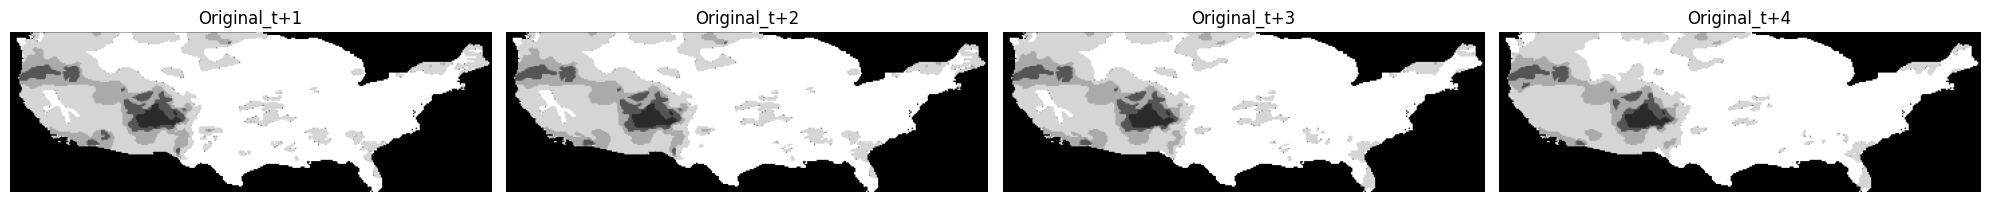

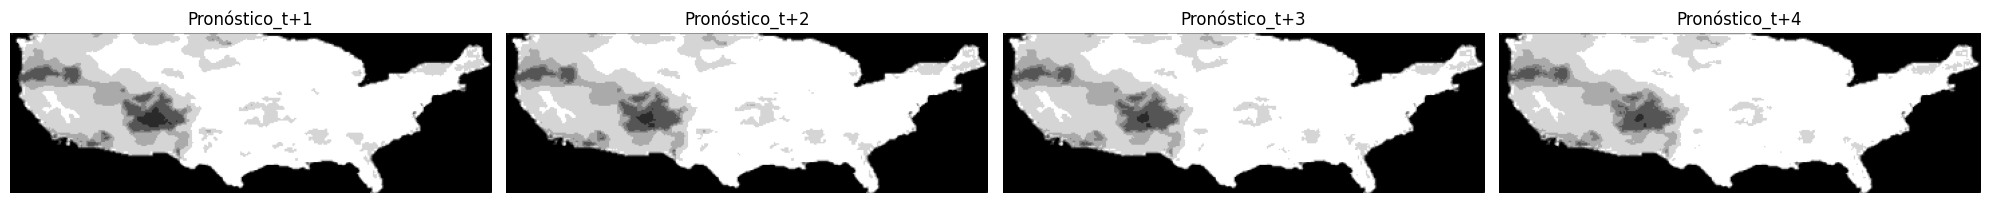

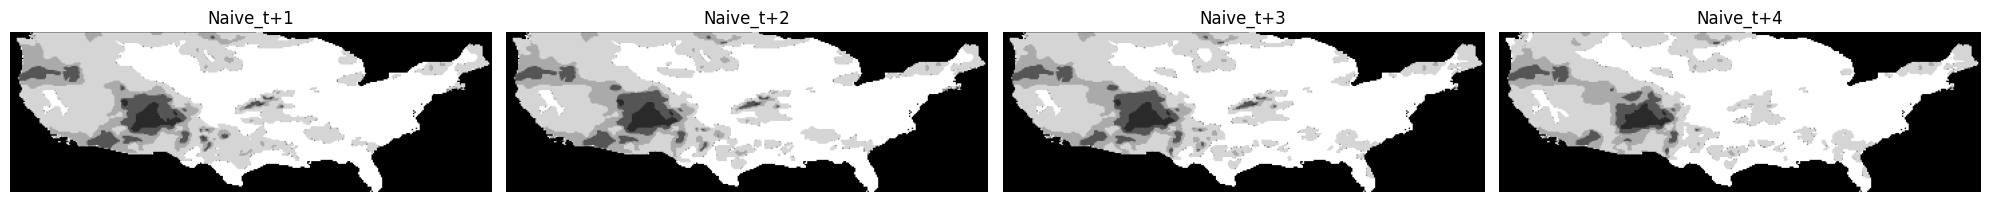

In [85]:
fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 100

for i in range(h):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(y_test[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Original_t+{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()
fig = plt.figure(figsize=(20,20))
for i in range(h):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(new_data[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Pronóstico_t+{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()
fig = plt.figure(figsize=(20,20))

for i in range(h):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(naive[pos,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Naive_t+{}'.format(i+1))
    ac += 1

# Ajustar el espaciado entre subplots
plt.subplots_adjust(wspace=.1, hspace=0.05)  # Puedes disminuir estos valores si es necesario
plt.tight_layout()
plt.show()